# Binary Classification

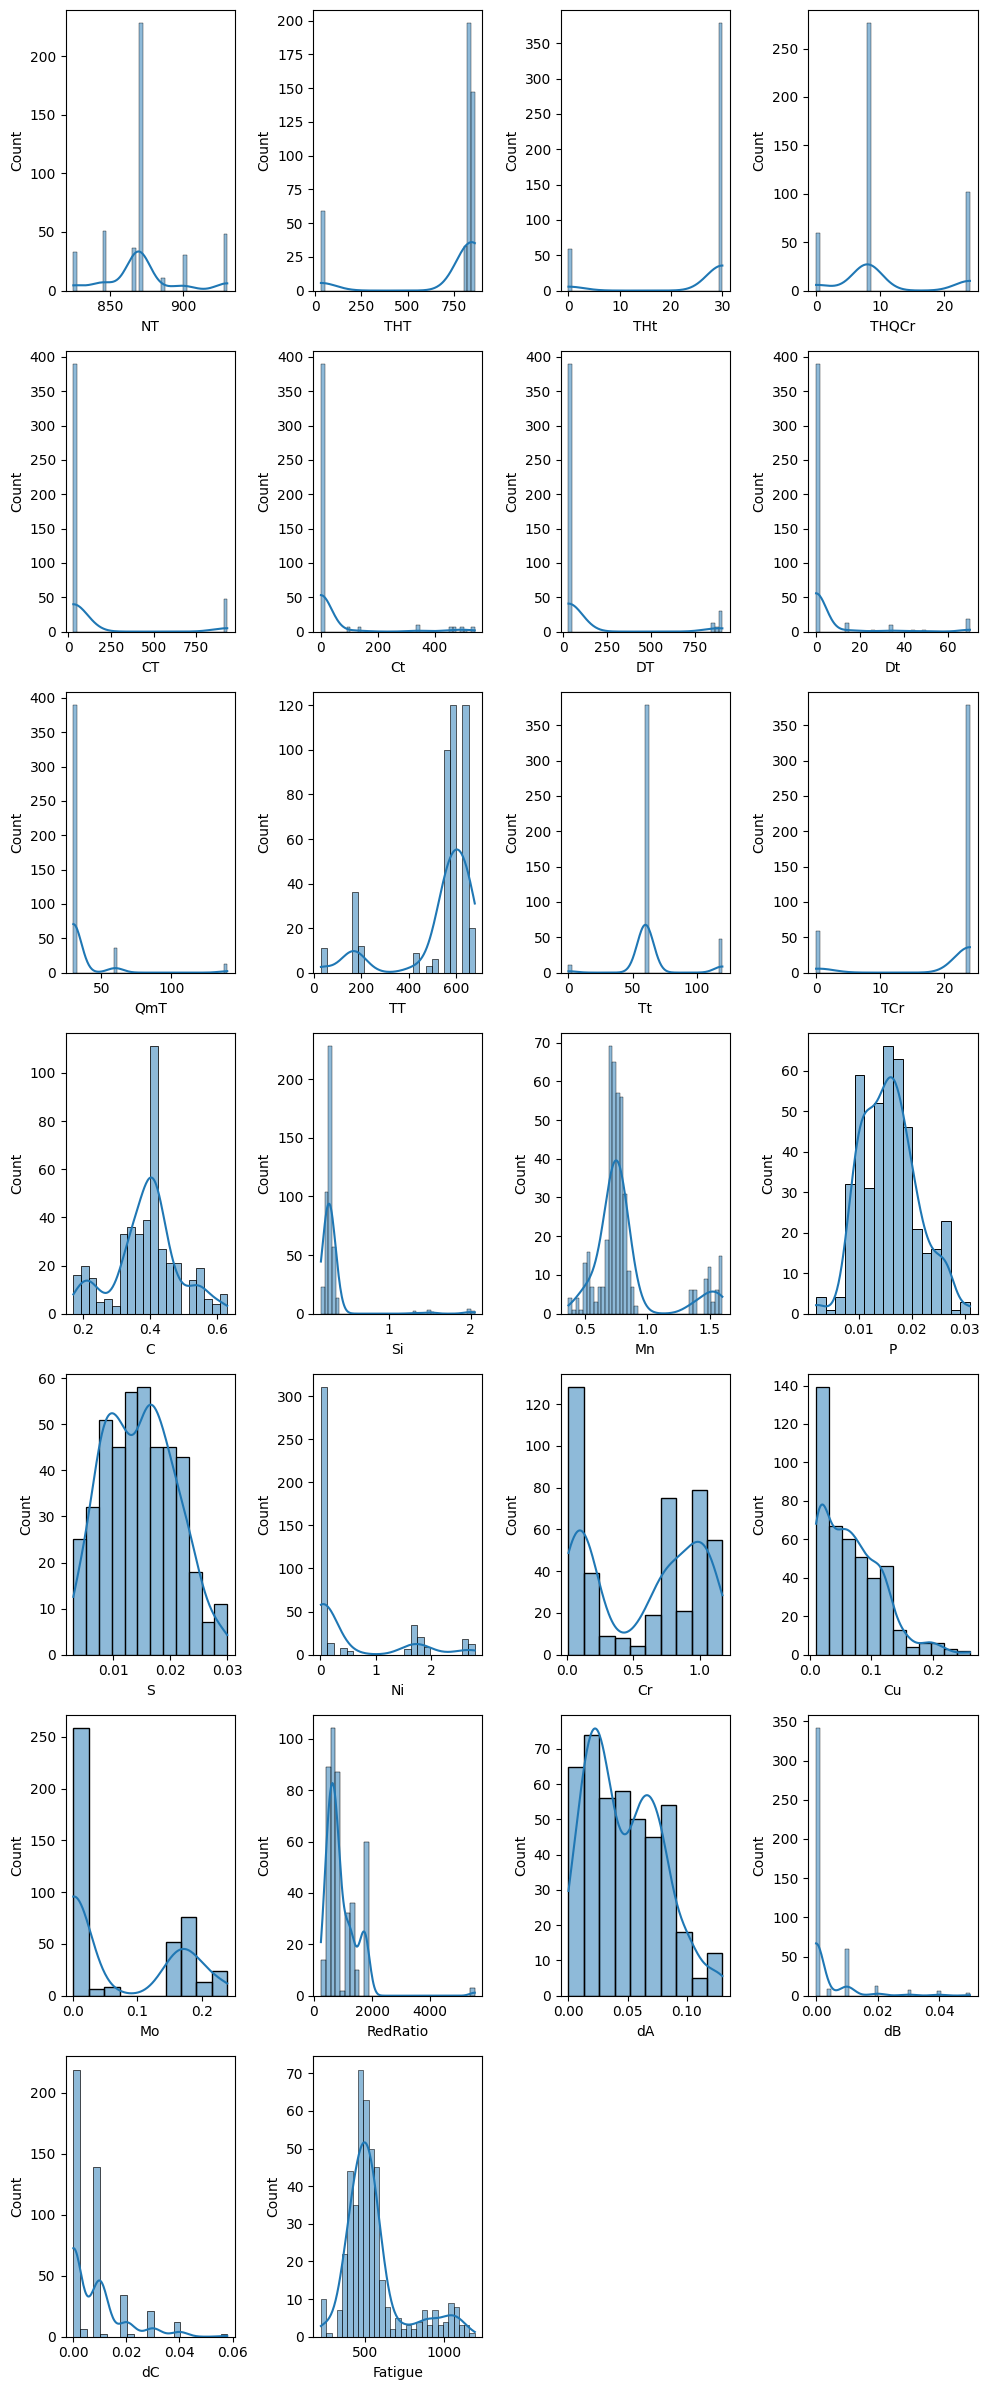

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv(r"C:\Users\ayber\OneDrive\Masaüstü\ML\Data\external\Fatigue_data.csv")
del df['Sl. No.']

features = df.columns

# Plotting histograms for all feature columns
plt.figure(figsize=(10, 24))
for i, column in enumerate(features):
    ax = plt.subplot(len(features) // 4 + 1, 4, i + 1)
    sns.histplot(data=df, x=column, kde=True)

plt.tight_layout()
plt.show()

In [3]:
df['goodmaterial']=(df.Fatigue>500.0).astype(int)

In [4]:
df.tail()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue,goodmaterial
432,930,30,0,0,930,340.2,895.812,70.2,140,160,...,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1030,1
433,930,30,0,0,930,340.2,895.812,70.2,140,160,...,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008,957,1
434,930,30,0,0,930,340.2,895.812,70.2,60,200,...,0.06,1.17,0.07,0.17,690,0.080,0.000,0.000,1104,1
435,930,30,0,0,930,340.2,895.812,70.2,60,200,...,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1008,1
436,930,30,0,0,930,340.2,895.812,70.2,60,200,...,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008,882,1


In [5]:
del df['Fatigue']

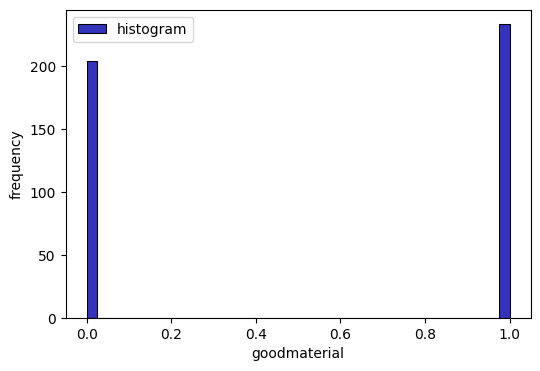

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.goodmaterial, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('goodmaterial')

plt.show()

In [7]:
df['C']=(df.C>0.4)
df['C'] = df['C'].replace({True: 'yes', False: 'no'})

In [8]:
pd.set_option('display.max_columns', None)

df

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,Tt,TCr,C,Si,Mn,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,goodmaterial
0,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,no,0.21,0.44,0.017,0.022,0.01,0.02,0.01,0.00,825,0.070,0.020,0.040,0
1,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,no,0.18,0.44,0.009,0.017,0.08,0.12,0.08,0.00,610,0.110,0.000,0.040,0
2,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,no,0.27,0.43,0.008,0.015,0.02,0.03,0.01,0.00,1270,0.070,0.020,0.000,0
3,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,no,0.23,0.51,0.018,0.024,0.01,0.02,0.01,0.00,1740,0.060,0.000,0.000,0
4,885,30,0,0,30,0.0,30.000,0.0,30,30,0,0.0,no,0.19,0.42,0.026,0.022,0.01,0.02,0.02,0.00,825,0.040,0.020,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,930,30,0,0,930,340.2,895.812,70.2,140,160,120,0.5,no,0.26,0.65,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1
433,930,30,0,0,930,340.2,895.812,70.2,140,160,120,0.5,no,0.25,0.79,0.016,0.015,0.07,1.08,0.08,0.15,530,0.017,0.004,0.008,1
434,930,30,0,0,930,340.2,895.812,70.2,60,200,120,0.5,no,0.31,0.81,0.012,0.019,0.06,1.17,0.07,0.17,690,0.080,0.000,0.000,1
435,930,30,0,0,930,340.2,895.812,70.2,60,200,120,0.5,no,0.26,0.65,0.015,0.024,0.02,0.91,0.01,0.15,240,0.050,0.010,0.000,1


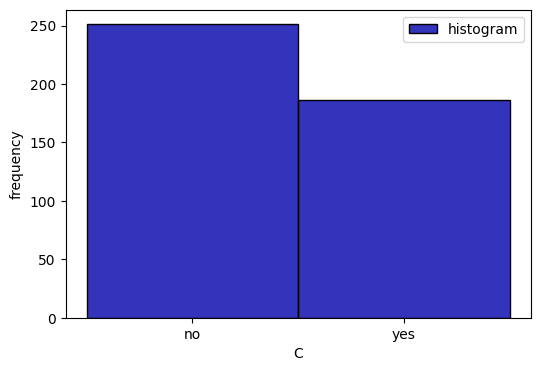

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.C, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('C')

plt.show()

# Train-Validation-Test Split

In [10]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.goodmaterial.values
y_val = df_val.goodmaterial.values

In [11]:
del df_train['goodmaterial']
del df_val['goodmaterial']

# Exploratory Data Analysis

In [12]:
global_mean = df_train_full.goodmaterial.mean()
round(global_mean, 3)

np.float64(0.519)

In [13]:
Cyes_mean = df_train_full[df_train_full.C == 'yes'].goodmaterial.mean()
print('C == yes:', round(Cyes_mean, 3))

Cno_mean = df_train_full[df_train_full.C == 'no'].goodmaterial.mean()
print('C == no:  ', round(Cno_mean, 3))

C == yes: 0.447
C == no:   0.574


In [14]:
df_train_full[df_train_full.Si < 0.3].goodmaterial.mean()

np.float64(0.48014440433212996)

In [15]:
df_train_full[(df_train_full.Si > 0.2)&(df_train_full.Si < 0.3)].goodmaterial.mean()

np.float64(0.46332046332046334)

In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
categorical = ['C']
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.goodmaterial)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

df_mi

,MI
C,0.007862


In [18]:
numerical=['NT',	'THT',	'THt'	,'THQCr',	'CT',	'Ct',	'DT',	'Dt',	'QmT',	'TT',	'Tt',	'TCr',	'Si',	'Mn',	'P',	'S',	'Ni',	'Cr',	'Cu',	'Mo',	'RedRatio',	'dA',	'dB',	'dC']
df_train_full[numerical].corrwith(df_train_full.goodmaterial).to_frame('correlation')

,correlation
NT,0.383251
THT,-0.237028
THt,-0.239762
THQCr,-0.520572
CT,0.336765
Ct,0.310673
DT,0.336656
Dt,0.292180
QmT,0.271019
TT,-0.326209


# One Hot Encoding

In [19]:
from sklearn.feature_extraction import DictVectorizer

In [20]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [21]:
train_dict[0]

{'C': 'no',
 'NT': 930,
 'THT': 30,
 'THt': 0,
 'THQCr': 0,
 'CT': 930,
 'Ct': 450.0,
 'DT': 895.517,
 'Dt': 34.8,
 'QmT': 60,
 'TT': 160,
 'Tt': 120,
 'TCr': 0.5,
 'Si': 0.26,
 'Mn': 0.76,
 'P': 0.009,
 'S': 0.014,
 'Ni': 0.56,
 'Cr': 0.62,
 'Cu': 0.12,
 'Mo': 0.17,
 'RedRatio': 690,
 'dA': 0.06,
 'dB': 0.0,
 'dC': 0.0}

In [22]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [23]:
X_train = dv.transform(train_dict)

In [24]:
X_train.shape

(233, 26)

In [25]:
dv.get_feature_names_out()

array(['C=no', 'C=yes', 'CT', 'Cr', 'Ct', 'Cu', 'DT', 'Dt', 'Mn', 'Mo',
       'NT', 'Ni', 'P', 'QmT', 'RedRatio', 'S', 'Si', 'TCr', 'THQCr',
       'THT', 'THt', 'TT', 'Tt', 'dA', 'dB', 'dC'], dtype=object)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [27]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [28]:
model.predict(X_val)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0])

In [29]:
model.predict_proba(X_val)

array([[9.21610928e-01, 7.83890725e-02],
       [8.90785651e-03, 9.91092143e-01],
       [8.61619648e-01, 1.38380352e-01],
       [9.96276846e-01, 3.72315422e-03],
       [9.63638253e-01, 3.63617468e-02],
       [9.75901224e-01, 2.40987757e-02],
       [5.96952392e-01, 4.03047608e-01],
       [1.00000000e+00, 1.14293859e-34],
       [7.43183959e-01, 2.56816041e-01],
       [2.06741486e-01, 7.93258514e-01],
       [0.00000000e+00, 1.00000000e+00],
       [5.38184634e-01, 4.61815366e-01],
       [7.62388716e-01, 2.37611284e-01],
       [2.59429789e-01, 7.40570211e-01],
       [7.57695574e-01, 2.42304426e-01],
       [9.14417245e-01, 8.55827553e-02],
       [7.71928500e-01, 2.28071500e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.20845382e-02, 9.77915462e-01],
       [2.12561093e-05, 9.99978744e-01],
       [9.99876992e-01, 1.23008458e-04],
       [4.86073099e-02, 9.51392690e-01],
       [7.07752390e-01, 2.92247610e-01],
       [0.000000

In [30]:
y_pred = model.predict_proba(X_val)[:, 1]

In [31]:
good = y_pred > 0.5

In [32]:
(y_val == good).mean()

np.float64(0.9137931034482759)

In [33]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'C=no': np.float64(-0.388),
 'C=yes': np.float64(0.395),
 'CT': np.float64(0.211),
 'Cr': np.float64(2.245),
 'Ct': np.float64(-0.003),
 'Cu': np.float64(0.098),
 'DT': np.float64(0.211),
 'Dt': np.float64(-0.0),
 'Mn': np.float64(-1.535),
 'Mo': np.float64(0.432),
 'NT': np.float64(-0.112),
 'Ni': np.float64(1.823),
 'P': np.float64(0.014),
 'QmT': np.float64(0.215),
 'RedRatio': np.float64(0.001),
 'S': np.float64(0.004),
 'Si': np.float64(-0.019),
 'TCr': np.float64(0.173),
 'THQCr': np.float64(-0.411),
 'THT': np.float64(0.097),
 'THt': np.float64(0.217),
 'TT': np.float64(-0.064),
 'Tt': np.float64(0.433),
 'dA': np.float64(0.039),
 'dB': np.float64(-0.005),
 'dC': np.float64(-0.014)}